In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yaml

try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")


In [15]:
df_cleaned = pd.read_csv(config['data']['clean']['file'],sep=";")

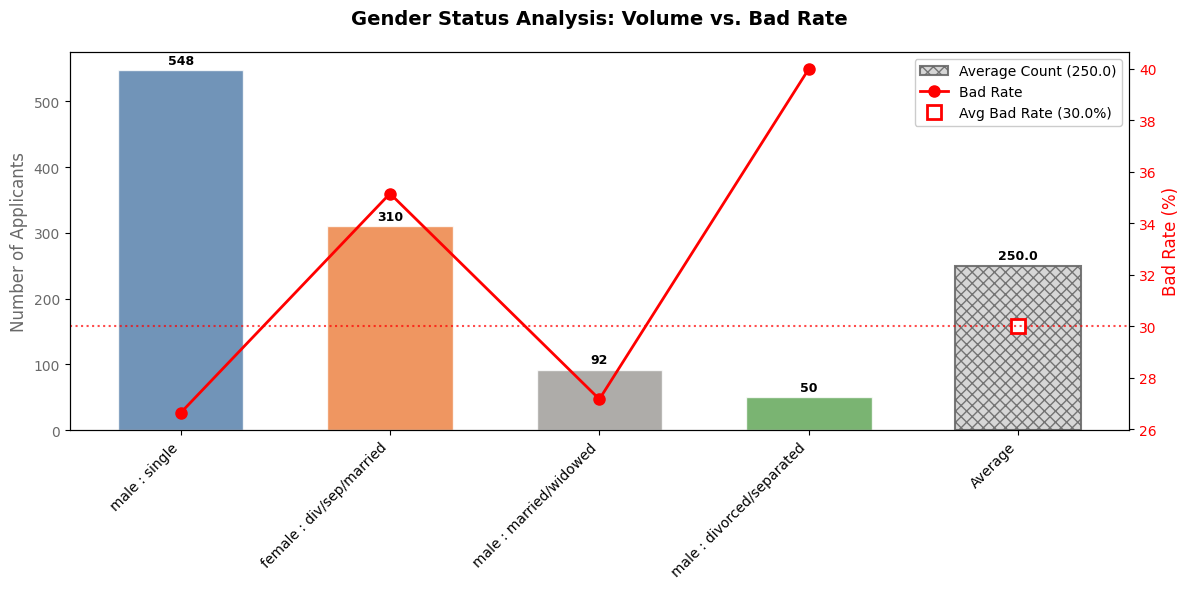

In [60]:
## EDA for gender_status vs risk
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Calculate statistics : count score for each gender_status and the percentage of bad score
gender_stats = df_cleaned.groupby('gender_status')['score'].agg(
    count='size',
    bad_rate=lambda x: (x == "bad").mean() * 100
).reset_index().sort_values('count', ascending=False)

# Calculate averages
avg_count = gender_stats['count'].mean()
avg_bad_rate = (df_cleaned['score'] == "bad").mean() * 100

# Create custom colormap for the bars
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=len(stats))

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax1.grid(False)

# Create positions for all bars
x_pos = np.arange(len(gender_stats)+1)  # +1 for average position
categories = list(gender_stats['gender_status']) + ['Average']

# Bar plot for counts with individual colors
bars = ax1.bar(x_pos[:-1], gender_stats['count'], 
               color=[cmap(i) for i in np.linspace(0, 1, len(stats))],
               alpha=0.8, width=0.6, edgecolor='white', linewidth=1)

# Special styling for average bar
avg_bar = ax1.bar(x_pos[-1], avg_count, 
                 color='lightgray', alpha=0.9, width=0.6,
                 hatch='xxx', edgecolor='dimgray', linewidth=1.5,
                 label=f'Average Count ({avg_count:.1f})')

# Line plot for bad rates
ax2 = ax1.twinx()
ax2.grid(False)
line = ax2.plot(x_pos[:-1], gender_stats['bad_rate'], 
               color='red', marker='o', markersize=8, 
               linewidth=2, label='Bad Rate')

# Average bad rate marker
avg_point = ax2.plot(x_pos[-1], avg_bad_rate, 's', 
                    markersize=10, color='white',
                    markeredgecolor='red', markeredgewidth=2,
                    label=f'Avg Bad Rate ({avg_bad_rate:.1f}%)')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom', 
            fontsize=9, fontweight='bold')

# Add average value label
ax1.text(avg_bar[0].get_x() + avg_bar[0].get_width()/2., 
        avg_count + 5, f'{avg_count:.1f}', 
        ha='center', va='bottom', fontsize=9, fontweight='bold')

# Customize axes
ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
ax1.set_ylabel('Number of Applicants', color='dimgray', fontsize=12)
ax2.set_ylabel('Bad Rate (%)', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='dimgray')
ax2.tick_params(axis='y', labelcolor='red')

# Add reference line for average bad rate
ax2.axhline(avg_bad_rate, color='red', linestyle=':', 
           linewidth=1.5, alpha=0.7)

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2,
          loc='upper right', framealpha=1)
plt.title('Gender Status Analysis: Volume vs. Bad Rate', 
         fontsize=14, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\jtrin\AppData\Local\Temp\ipykernel_7188\3369166181.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df_cleaned.groupby('age_group')['score'].agg(


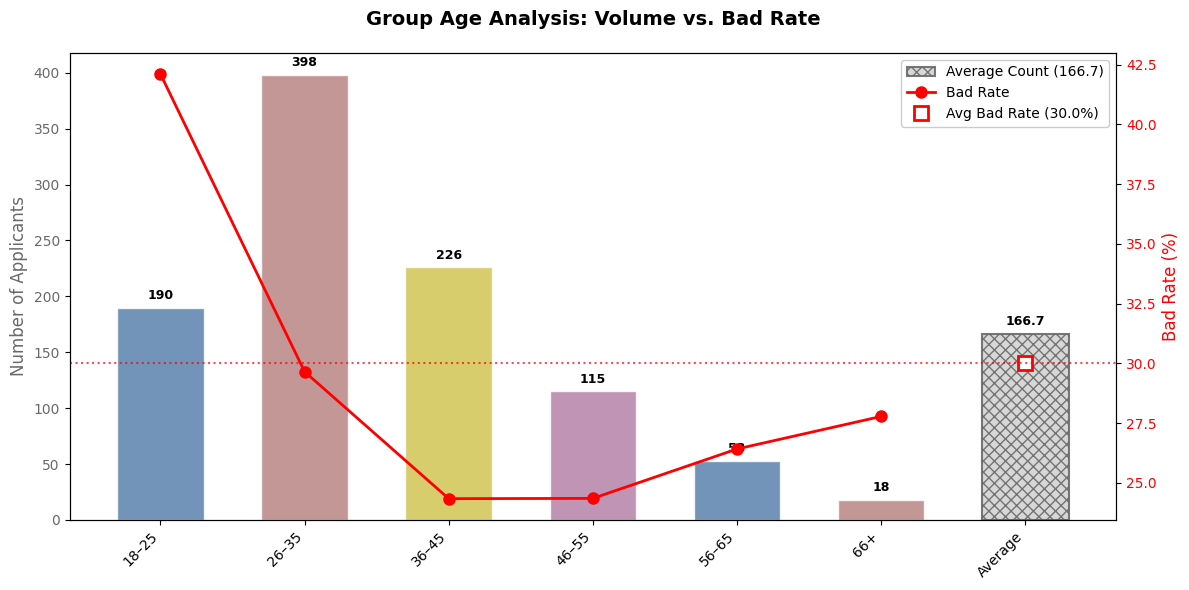

In [62]:
## EDA for the Age vs risk
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.lines as mlines

bins = [17, 25, 35, 45, 55, 65, df_cleaned['age'].max()]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '66+']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=True)

# Step 1: Group and calculate total & bad rate
age_stats = df_cleaned.groupby('age_group')['score'].agg(
    total_count='count',
    bad_rate=lambda x: (x == "bad").mean() * 100
).reset_index()#.sort_values('bad_rate', ascending=False)

# Calculate averages
avg_count = age_stats['total_count'].mean()
avg_bad_rate = (df_cleaned['score'] == "bad").mean() * 100

# Create custom colormap for the bars
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f','#edc948', '#b07aa1']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=len(age_stats))

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax1.grid(False)

# Create positions for all bars
x_pos = np.arange(len(age_stats)+1)  # +1 for average position
categories = list(age_stats['age_group']) + ['Average']

# Bar plot for counts with individual colors
bars = ax1.bar(x_pos[:-1], age_stats['total_count'], 
               color=[cmap(i) for i in np.linspace(0, 1, len(stats))],
               alpha=0.8, width=0.6, edgecolor='white', linewidth=1)

# Special styling for average bar
avg_bar = ax1.bar(x_pos[-1], avg_count, 
                 color='lightgray', alpha=0.9, width=0.6,
                 hatch='xxx', edgecolor='dimgray', linewidth=1.5,
                 label=f'Average Count ({avg_count:.1f})')

# Line plot for bad rates
ax2 = ax1.twinx()
ax2.grid(False)
line = ax2.plot(x_pos[:-1], age_stats['bad_rate'], 
               color='red', marker='o', markersize=8, 
               linewidth=2, label='Bad Rate')

# Average bad rate marker
avg_point = ax2.plot(x_pos[-1], avg_bad_rate, 's', 
                    markersize=10, color='white',
                    markeredgecolor='red', markeredgewidth=2,
                    label=f'Avg Bad Rate ({avg_bad_rate:.1f}%)')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom', 
            fontsize=9, fontweight='bold')

# Add average value label
ax1.text(avg_bar[0].get_x() + avg_bar[0].get_width()/2., 
        avg_count + 5, f'{avg_count:.1f}', 
        ha='center', va='bottom', fontsize=9, fontweight='bold')

# Customize axes
ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
ax1.set_ylabel('Number of Applicants', color='dimgray', fontsize=12)
ax2.set_ylabel('Bad Rate (%)', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='dimgray')
ax2.tick_params(axis='y', labelcolor='red')

# Add reference line for average bad rate
ax2.axhline(avg_bad_rate, color='red', linestyle=':', 
           linewidth=1.5, alpha=0.7)

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2,
          loc='upper right', framealpha=1)

plt.title('Group Age Analysis: Volume vs. Bad Rate', 
         fontsize=14, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()